In [15]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
import datetime
from tensorflow.python import tf2
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [2]:
mnist = keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [4]:
#checking shape
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [5]:
#definig class name
class_name = ['top', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']

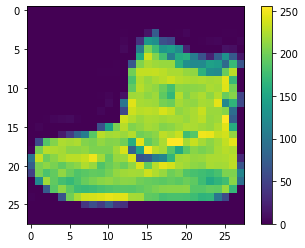

In [6]:
#plotting image
plt.figure()
plt.imshow(X_train[0])
plt.colorbar()

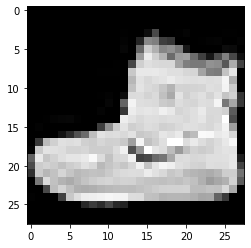

In [10]:
plt.imshow(X_train[0], cmap = 'gray')
plt.show()

In [11]:
X_train.shape

(60000, 28, 28)

In [12]:
# Normalize and flatten the images. It works better for backpropagation 
X_train = X_train / 255
X_test_original = X_test
X_test = X_test / 255

# Flatten the images. Images are to be input as vector
X_train = X_train.reshape((-1, 784))
X_test = X_test.reshape((-1, 784))

# Note that these vectors here are images, but they could be sound recordings, just regular rows from a dataset, anything. / 255)


In [16]:
model = Sequential([ # as far as we know, all networks are sequential
  Dense(64, activation='relu', input_shape=(784,)), # 784= 28*28 dense networks means all neurons in one layer are connected to all neurons of the next layer
  Dense(64, activation='relu'),      # choosing relu instead of sigmoid, this is somewhat common
  Dense(10, activation='softmax'),   # the softmax actiavation is the last one to compensate for the high volume additions
])

# Compile the model.
model.compile(
  optimizer='adam', #here we could use stochastic gradient descent, but adam is a de facto standard
  loss='categorical_crossentropy', #this is how we create the original blame to play the blame game
  metrics=['accuracy'],
)

# Train the model.
history = model.fit(
  X_train,
  to_categorical(y_train), # just to make sure the outputs are not considered numeric (because, ya know, they are numbers...)
  validation_data = (X_test, to_categorical(y_test)),
  epochs=80, # go 20 times through the whole dataset
  batch_size=32, # send 32 images at a time before you tweak the network again, to make it faster
)
with open("history_temp.p", "wb") as file_pi:
  pickle.dump(history.history, file_pi)


Epoch 1/80
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5137 - accuracy: 0.8199 - val_loss: 0.4324 - val_accuracy: 0.8439
Epoch 2/80
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3829 - accuracy: 0.8623 - val_loss: 0.3935 - val_accuracy: 0.8594
Epoch 3/80
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3453 - accuracy: 0.8737 - val_loss: 0.3599 - val_accuracy: 0.8753
Epoch 4/80
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3197 - accuracy: 0.8833 - val_loss: 0.3720 - val_accuracy: 0.8642
Epoch 5/80
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3048 - accuracy: 0.8864 - val_loss: 0.3620 - val_accuracy: 0.8687
Epoch 6/80
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2919 - accuracy: 0.8913 - val_loss: 0.3600 - val_accuracy: 0.8707
Epoch 7/80
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2764 - accuracy: 0.8961 - val_loss: 0.3442 - val_accuracy:

In [17]:
model.save('model_FCN.h5')  # creates a HDF5 file 'my_model.h5'

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                50240     
                                                                 
 dense_7 (Dense)             (None, 64)                4160      
                                                                 
 dense_8 (Dense)             (None, 10)                650       
                                                                 
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________
None
None


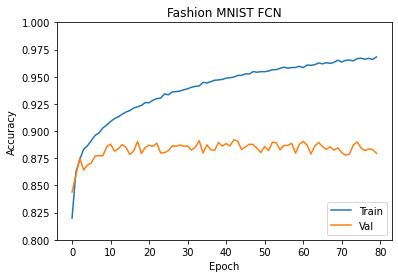

In [20]:
#Viz the model & training history
from keras.utils import plot_model

def visualizemodel(classifier):
  plot_model(classifier, to_file="plot_FCN_training.png", expand_nested=False)

def visualizetraining(history):
  fig = plt.figure()
  plt.plot(history['accuracy'])
  plt.plot(history['val_accuracy'])
  plt.title ('Fashion MNIST FCN')
  plt.ylabel ('Accuracy')
  plt.xlabel ('Epoch')
  plt.legend (['Train', 'Val'], loc='lower right')
  plt.ylim (0.8, 1.0)
  plt.show()
  fig.savefig('history_FCN_training.png',dpi=300)

print (model.summary())
print (visualizemodel(model))
visualizetraining(history.history)